In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

In [ ]:
X, y = make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)
# Standardizing the data.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# alpha : float
# Constant that multiplies the regularization term. 
clf = linear_model.SGDClassifier(eta0=0.0001, alpha=0.0001, loss='log', random_state=15, penalty='l2', tol=1e-3, verbose=2, learning_rate='constant')
clf

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0001, fit_intercept=True, l1_ratio=0.15,
       learning_rate='constant', loss='log', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=15, shuffle=True,
       tol=0.001, verbose=2, warm_start=False)

In [ ]:
clf.fit(X=X_train, y=y_train) # fitting our model

-- Epoch 1
Norm: 0.70, NNZs: 15, Bias: -0.499391, T: 37500, Avg. loss: 0.552631
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.04, NNZs: 15, Bias: -0.750277, T: 75000, Avg. loss: 0.448128
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 1.26, NNZs: 15, Bias: -0.902777, T: 112500, Avg. loss: 0.415726
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 1.42, NNZs: 15, Bias: -1.003874, T: 150000, Avg. loss: 0.400898
Total training time: 0.04 seconds.
-- Epoch 5
Norm: 1.55, NNZs: 15, Bias: -1.075094, T: 187500, Avg. loss: 0.392871
Total training time: 0.05 seconds.
-- Epoch 6
Norm: 1.65, NNZs: 15, Bias: -1.128728, T: 225000, Avg. loss: 0.388085
Total training time: 0.06 seconds.
-- Epoch 7
Norm: 1.73, NNZs: 15, Bias: -1.169943, T: 262500, Avg. loss: 0.385063
Total training time: 0.07 seconds.
-- Epoch 8
Norm: 1.80, NNZs: 15, Bias: -1.203552, T: 300000, Avg. loss: 0.383058
Total training time: 0.08 seconds.
-- Epoch 9
Norm: 1.86, NNZs: 15, Bias: -1.230411, T: 337500, Avg. loss: 0.

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0001, fit_intercept=True, l1_ratio=0.15,
       learning_rate='constant', loss='log', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=15, shuffle=True,
       tol=0.001, verbose=2, warm_start=False)

In [ ]:
clf.coef_, clf.coef_.shape, clf.intercept_
#clf.coef_ will return the weights
#clf.coef_.shape will return the shape of weights
#clf.intercept_ will return the intercept term

(array([[-0.83187476,  0.58935497, -0.05233948,  0.59159475, -0.33771644,
          0.87826212, -0.85798961, -0.06890856,  0.37968271,  0.3720168 ,
          0.22881296,  0.04398642, -0.08060734,  0.51274272,  0.07080401]]),
 (1, 15),
 array([-1.24946622]))

In [ ]:
def initialize_weights(dim):
    ''' In this function, we will initialize our weights and bias'''
    #initialize the weights to zeros array of (1,dim) dimensions
    #you use zeros_like function to initialize zero, check this link https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros_like.html
    #initialize bias to zero
    w=np.zeros_like(dim)
    b=0
    return w,b

<font color='blue'>Compute sigmoid </font>

$sigmoid(z)= 1/(1+exp(-z))$

In [ ]:
def sigmoid(z):
    ''' In this function, we will return sigmoid of z'''
    # compute sigmoid(z) and return
    sigz=1/(1+np.exp(-z))
    return sigz

<font color='blue'> Compute loss </font>

$log loss = -1*\frac{1}{n}\Sigma_{for each Yt,Y_{pred}}(Ytlog10(Y_{pred})+(1-Yt)log10(1-Y_{pred}))$

In [ ]:
def logloss(y_true,y_pred):
    '''In this function, we will compute log loss '''
    n=len(y_true)
    total=0
    for i in range(0,n):
        total+=y_true[i]*np.log10(y_pred[i])+(1-y_true[i])*np.log10(1-y_pred[i])
    loss=(total*-1)/n
    return loss

<font color='blue'>Compute gradient w.r.to  'w' </font>

$dw^{(t)} = x_n(y_n − σ((w^{(t)})^{T} x_n+b^{t}))- \frac{λ}{N}w^{(t)}$ <br>

In [ ]:
def gradient_dw(x,y,w,b,alpha,N):
    '''In this function, we will compute the gardient w.r.to w '''
    z=sigmoid(np.dot(np.transpose(w),x)+b)
    dw=x*(y-z)-(alpha/N)*np.transpose(w)
    return dw

<font color='blue'>Compute gradient w.r.to 'b' </font>

$ db^{(t)} = y_n- σ((w^{(t)})^{T} x_n+b^{t})$

In [ ]:
 def gradient_db(x,y,w,b):
     '''In this function, we will compute gradient w.r.to b '''
     z=sigmoid(np.dot(np.transpose(w),x)+b)
     db=y-z
     return db

In [ ]:
train_loss=[]
test_loss=[]

In [ ]:
def train(X_train,y_train,X_test,y_test,epochs,alpha,eta0):
    ''' In this function, we will implement logistic regression'''
    #Here eta0 is learning rate
    #implement the code as follows
    # initalize the weights (call the initialize_weights(X_train[0]) function)
    w,b=initialize_weights(X_train[0])
    
    # for every epoch
    for i in range(0,epochs):
        # for every data point(X_train,y_train)
        for j in range(0,len(X_train)):
           #compute gradient w.r.to w (call the gradient_dw() function)
           dw=gradient_dw(X_train[j],y_train[j],w,b,alpha,N)
           #compute gradient w.r.to b (call the gradient_db() function)
           db=gradient_db(X_train[j],y_train[j],w,b)
           w=w+eta0*dw
           b=b+eta0*db
         
           #update w, b
        pred=[]
        # predict the output of x_train[for all data points in X_train] using w,b
        for j in range(0,len(X_train)):
            d=np.dot(np.transpose(w),X_train[j])+b
            pred.append(sigmoid(d))
        #compute the loss between predicted and actual values (call the loss function)
        train_loss.append(logloss(y_train,pred))
        # store all the train loss values in a list
        # predict the output of x_test[for all data points in X_test] using w,b
        pred=[]
        for j in range(0,len(X_test)):
            d=np.dot(np.transpose(w),X_test[j])+b
            pred.append(sigmoid(d))
        #compute the loss between predicted and actual values (call the loss function)
        test_loss.append(logloss(y_test,pred))
        # store all the test loss values in a list
        # you can also compare previous loss and current loss, if loss is not updating then stop the process and return w,b
        #if(i!=0 and test_loss[i]==test_loss[i-1]):
         #   break

    return w,b

In [ ]:
alpha=0.0001
eta0=0.0001
N=len(X_train)
epochs=10
w,b=train(X_train,y_train,X_test,y_test,epochs,alpha,eta0)

In [ ]:
# these are the results we got after we implemented sgd and found the optimal weights and intercept
w-clf.coef_, b-clf.intercept_

(array([[-3.56441269e-03,  6.19465370e-03,  1.91506968e-03,
         -1.95178567e-04,  9.59670368e-04, -3.46279712e-05,
          8.31685290e-04,  5.23557174e-04,  4.61113273e-03,
         -3.90074267e-03, -1.08531791e-04,  3.24047785e-03,
          8.45749627e-04,  4.56977319e-04, -1.65124455e-04]]),
 array([0.00156173]))

In [ ]:
w,clf.coef_

(array([-0.83543917,  0.59554963, -0.05042441,  0.59139957, -0.33675676,
         0.87822749, -0.85715792, -0.068385  ,  0.38429384,  0.36811606,
         0.22870443,  0.0472269 , -0.07976159,  0.5131997 ,  0.07063889]),
 array([[-0.83187476,  0.58935497, -0.05233948,  0.59159475, -0.33771644,
          0.87826212, -0.85798961, -0.06890856,  0.37968271,  0.3720168 ,
          0.22881296,  0.04398642, -0.08060734,  0.51274272,  0.07080401]]))

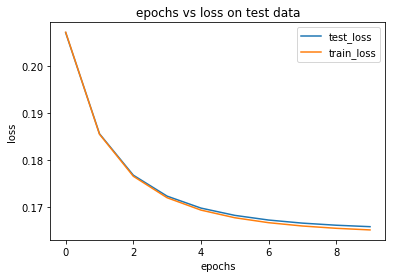

In [ ]:
import matplotlib.pyplot as plt
plt.plot(np.arange(10),test_loss,label='test_loss')
plt.plot(np.arange(10),train_loss,label='train_loss')
plt.title('epochs vs loss on test data')
plt.xlabel('epochs')
plt.ylabel("loss")
plt.legend()

In [ ]:
def pred(w,b, X):
    N = len(X)
    predict = []
    for i in range(N):
        z=np.dot(w,X[i])+b
        if sigmoid(z) >= 0.5: # sigmoid(w,x,b) returns 1/(1+exp(-(dot(x,w)+b)))
            predict.append(1)
        else:
            predict.append(0)
    return np.array(predict)
print(1-np.sum(y_train - pred(w,b,X_train))/len(X_train))
print(1-np.sum(y_test  - pred(w,b,X_test))/len(X_test))